Figures S7 to S11 in the Supplementary Information

In [11]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

# Creating the colorblind-friendly palette and defining color for each PFT
palette = sns.color_palette("colorblind", 8)
spec_colors = {
    'USSRM': palette[0],  
    'AURIG': palette[1],  
    'USSRC': palette[3],  
    'DKSOR': '#000000'    
}
pft_colors = {
    'Woody Savanna': spec_colors['USSRM'],  
    'Evergreen Needle Forest': palette[2],  
    'Deciduous Broadleaf Forest': spec_colors['DKSOR'],  
    'Open Shrubland': spec_colors['USSRC'],  
    'Evergreen Broadleaf Forest': palette[7], 
    'Grassland': spec_colors['AURIG'], 
    'Savanna': palette[5]
}

# Loading files
file_names = [
    "AUGIN.xlsx", "CNQIA.xlsx", "CNDIN.xlsx", "DKSOR.xlsx", 
    "ESLJU.xlsx", "NLLOO.xlsx", "AUDAS.xlsx", "USOHO.xlsx", 
    "MYPSO.xlsx", "USSRM.xlsx", "USSRC.xlsx", "AURIG.xlsx", 
    "USSRG.xlsx"
]

markers = ['o', 's', '^', 'D', '*', 'X', '<', '>', '3', '8', 'p', 'h', '+']

site_labels = {
    'AUGIN': ('Woody Savanna', 'AU-Gin'),
    'USSRM': ('Woody Savanna', 'US-SRM'),
    'CNQIA': ('Evergreen Needle Forest', 'CN-Qia'),
    'NLLOO': ('Evergreen Needle Forest', 'NL-Loo'),
    'DKSOR': ('Deciduous Broadleaf Forest', 'DK-Sor'),
    'USOHO': ('Deciduous Broadleaf Forest', 'US-Oho'),
    'ESLJU': ('Open Shrubland', 'ES-LJu'),
    'USSRC': ('Open Shrubland', 'US-SRC'),
    'CNDIN': ('Evergreen Broadleaf Forest', 'CN-Din'),
    'MYPSO': ('Evergreen Broadleaf Forest', 'MY-PSO'),
    'AURIG': ('Grassland', 'AU-Rig'),
    'USSRG': ('Grassland', 'US-SRG'),
    'AUDAS': ('Savanna', 'AU-DaS'),
}

Figure S7 in the Supplementary information - Relationship between average NEE asymmetry and 3yr shortwave radiation average for top 1% fluctuations for all sites 


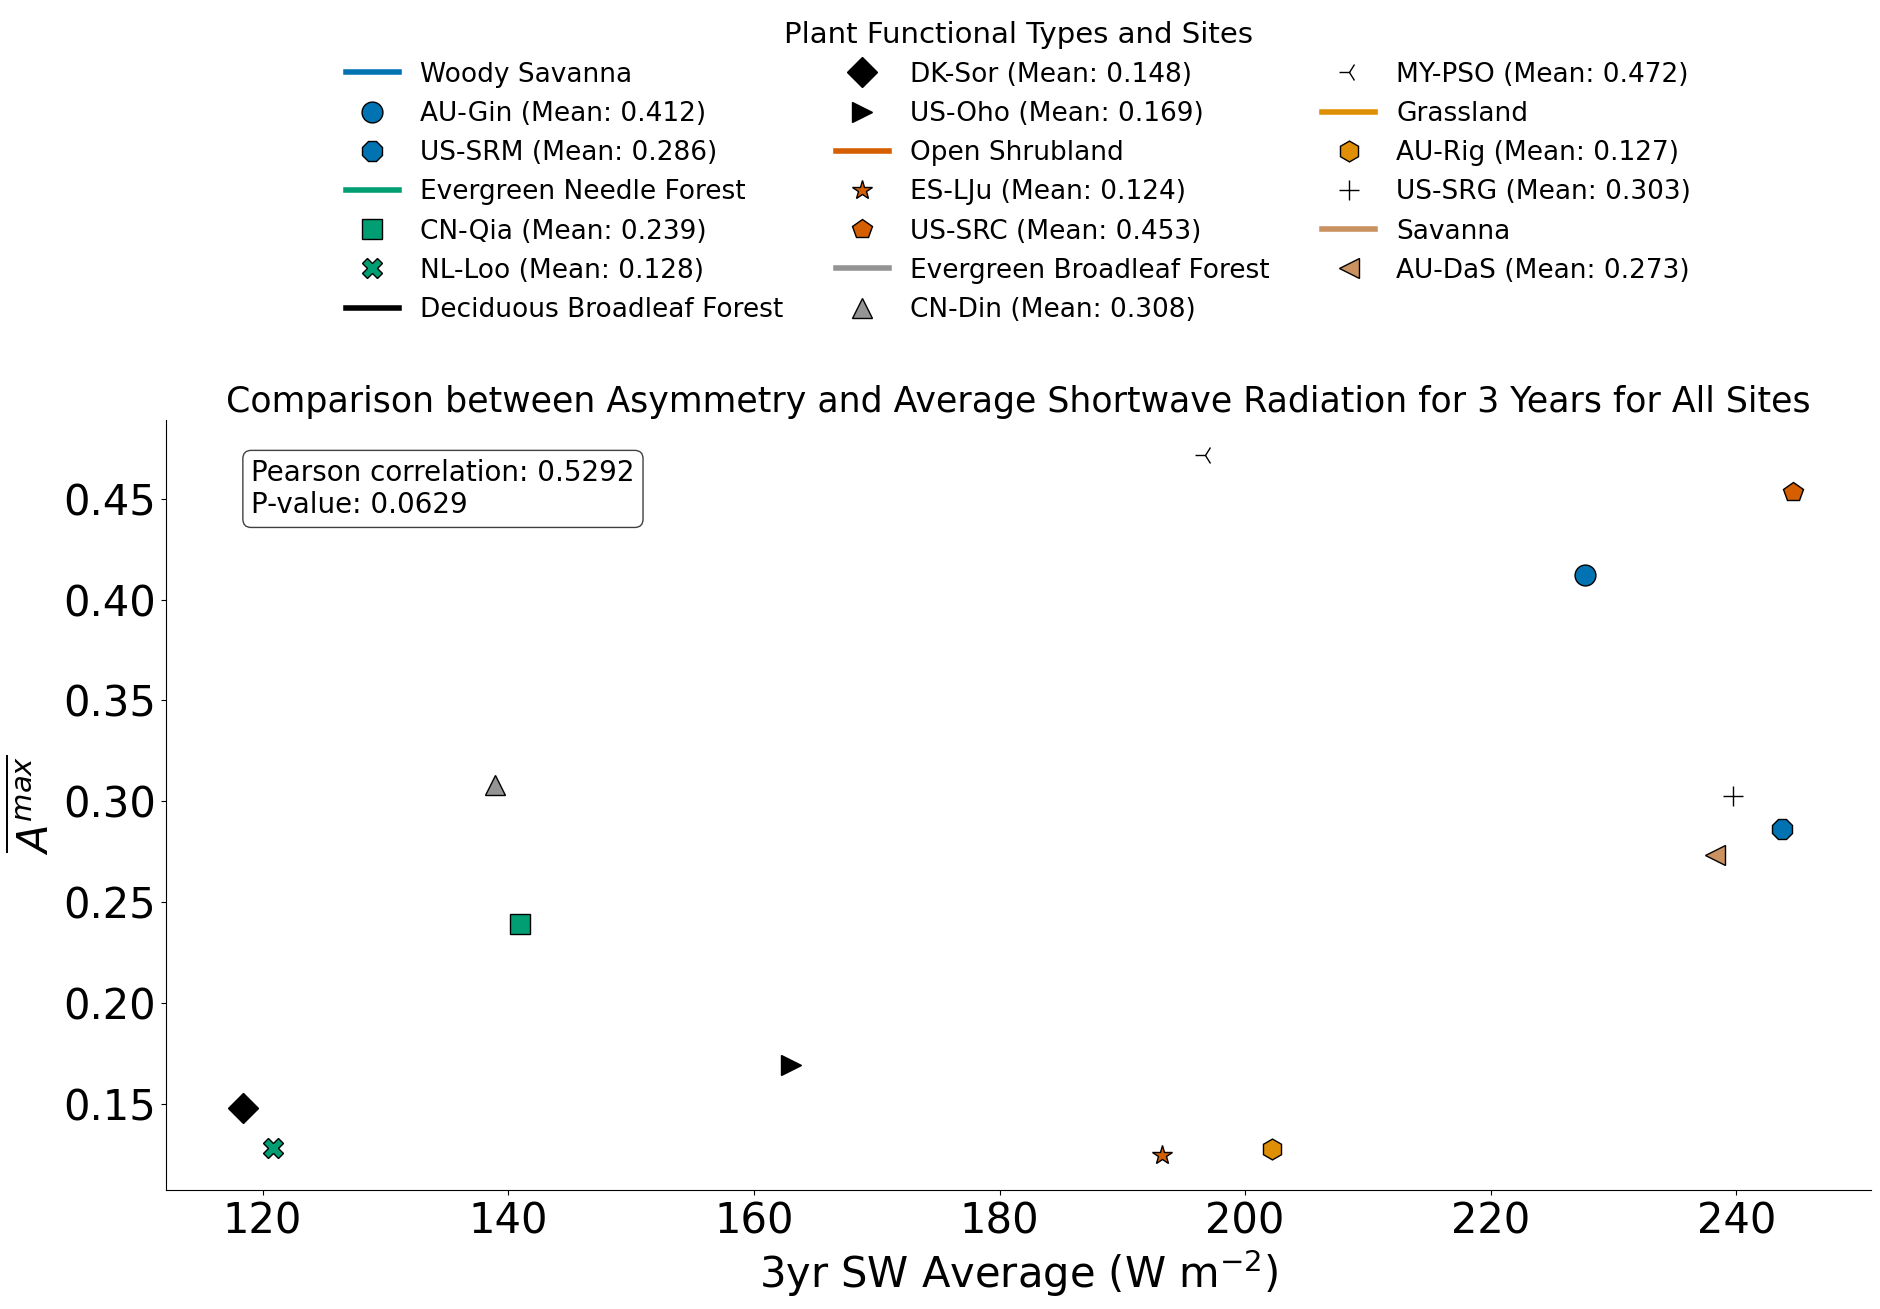

In [12]:
# creating ditionary to store shortwave data
sw_data = {}

for file, marker in zip(file_names, markers):
    site_val = file[:5]
    
    if site_val in site_labels:
        pft, label = site_labels[site_val]
        color = pft_colors[pft]
        
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/3YRSW/{file}")
        
        sw_3yr = df.iloc[0, 1]   

        peakssw = df.iloc[:, 0]
        
        meanacsw = np.mean(peakssw)
        stdacsw = np.std(peakssw)
        
        sw_data[label] = {"sw_3yr": sw_3yr, "meanacsw": meanacsw, "stdacsw": stdacsw, "marker": marker, "color": color}

# calculating statistics and getting data
x_data = []
y_data = []
for site, data in sw_data.items():
    x_data.append(data["sw_3yr"])
    y_data.append(data["meanacsw"])

x_data = np.array(x_data)
y_data = np.array(y_data)

correlation, p_value = stats.pearsonr(x_data, y_data)

fig, ax_main = plt.subplots(figsize=(22, 10))

# Plotting
for site, data in sw_data.items():
    ax_main.plot(data["sw_3yr"], data["meanacsw"],
                 marker=data["marker"], color=data["color"], 
                 markeredgecolor='black', markerfacecolor=data["color"],
                 label=site, markersize=15)

ax_main.set_xlabel('3yr SW Average (W m$^{-2}$)', fontsize=30)
ax_main.set_ylabel('$\overline{A^{max}}$', fontsize=30)
ax_main.tick_params(axis='both', which='major', labelsize=30)
ax_main.set_title('Comparison between Asymmetry and Average Shortwave Radiation for 3 Years for All Sites', fontsize=25)

ax_main.spines['right'].set_visible(False)
ax_main.spines['top'].set_visible(False)

textstr = f'Pearson correlation: {correlation:.4f}\nP-value: {p_value:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.75)
ax_main.text(0.05, 0.95, textstr, transform=ax_main.transAxes, fontsize=20,
             verticalalignment='top', bbox=props)

# Creating the legend
handles, labels = ax_main.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pft_groups = {}
for site_val, (pft, site_label) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_label)

legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            data = sw_data[site]
            legend_elements.append(plt.Line2D([0], [0], marker=data['marker'], color='w', 
                                              label=f"{site} (Mean: {data['meanacsw']:.3f})",
                                              markerfacecolor=color, markersize=15, markeredgecolor='black'))

legend = ax_main.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.55), 
                        fontsize=19, title="Plant Functional Types and Sites", ncol=3, frameon=False)

legend.get_title().set_fontsize(21)

plt.show()

Figure S8 in the Supplementary information - : Relationship between average NEE asymmetry and daily average shortwave radiation for top 1% fluctuations for all sites


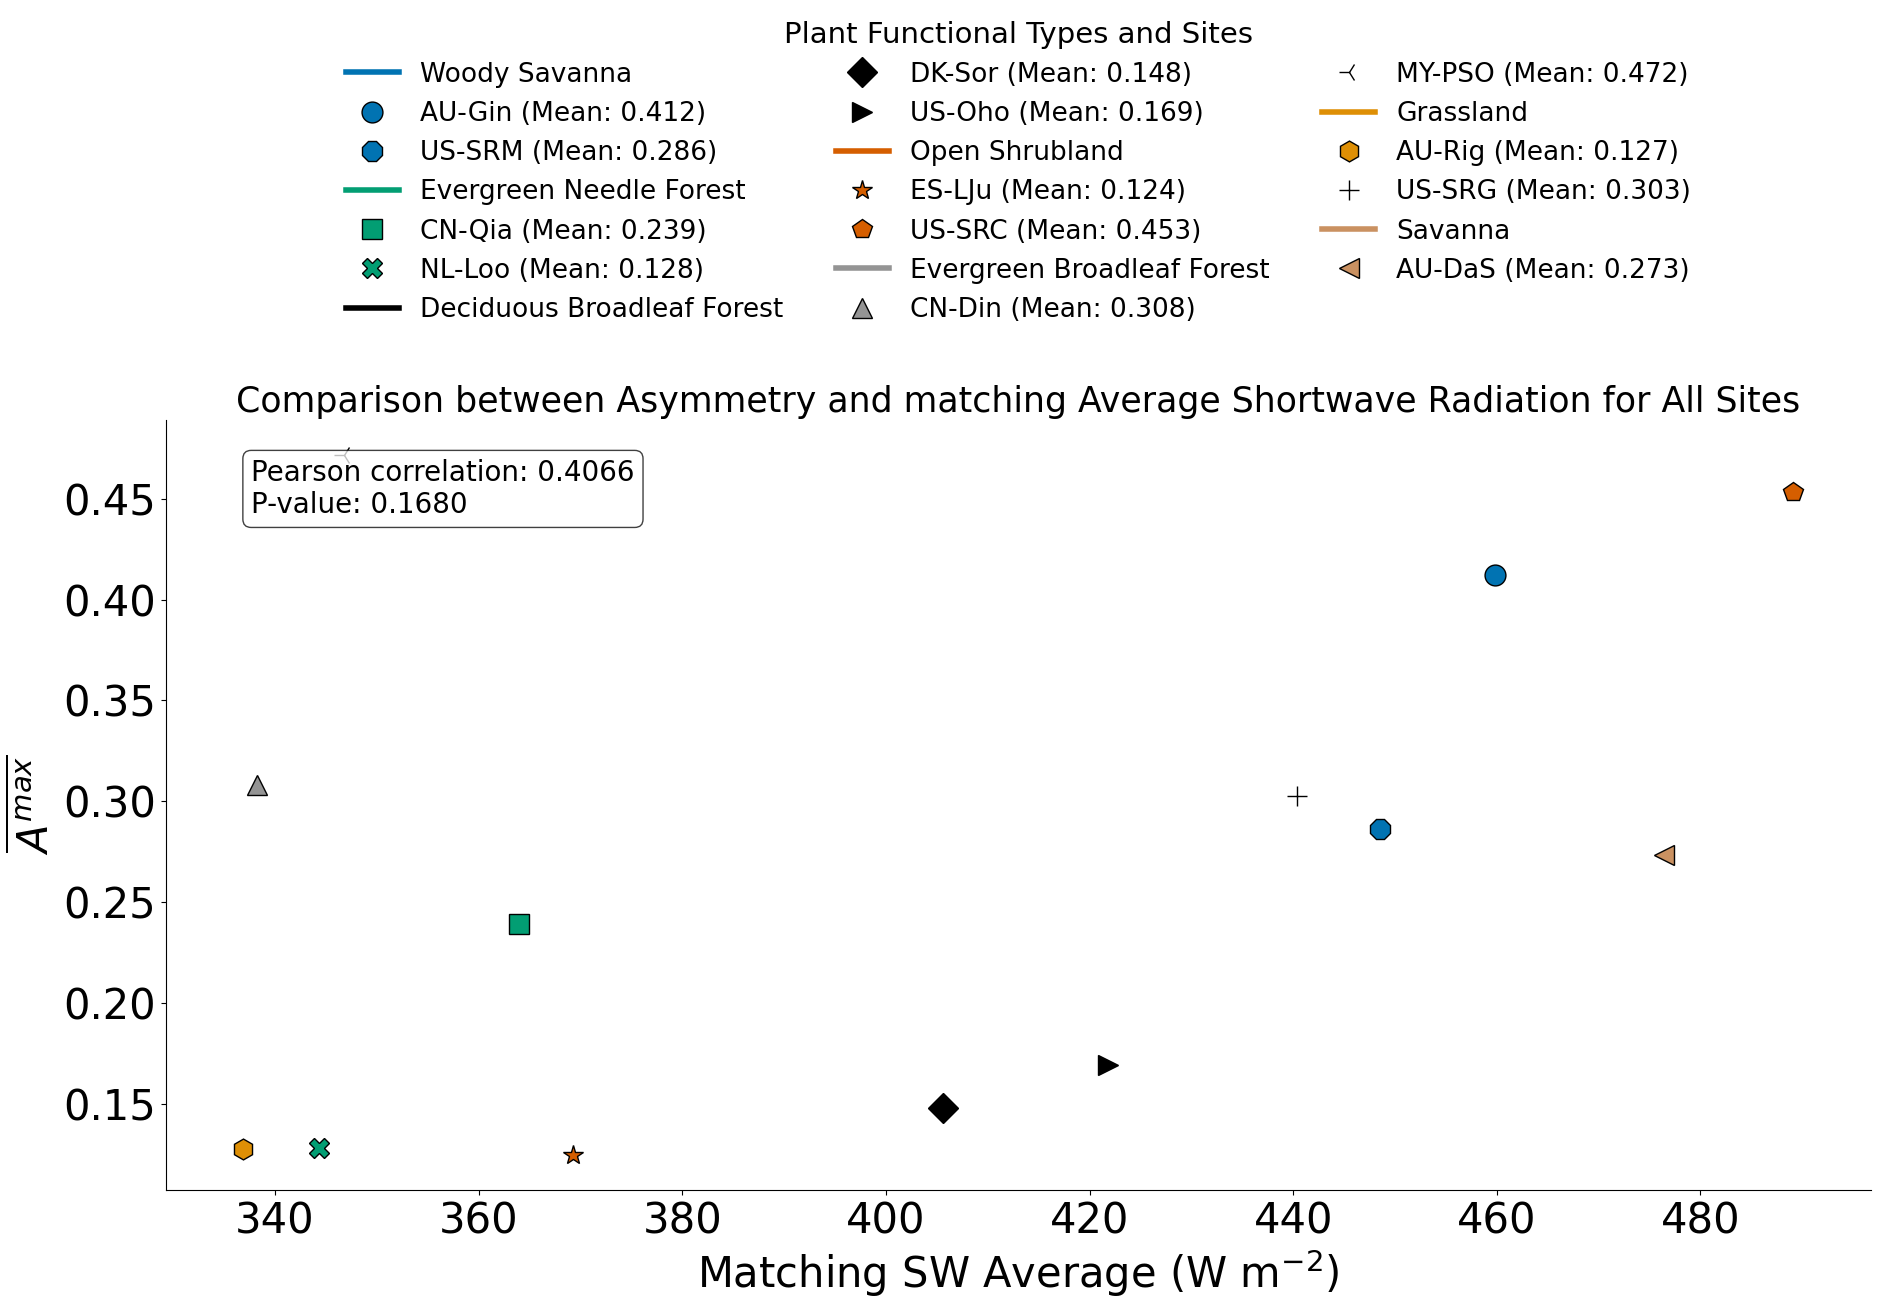

In [13]:
# creating ditionary to store shortwave data
sw_data = {}

for file, marker in zip(file_names, markers):
    site_val = file[:5]
    
    if site_val in site_labels:
        pft, label = site_labels[site_val]
        color = pft_colors[pft]
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/MATCHINGSW/{file}")
        sw_mtchng = df.iloc[0, 1]   
        peakssw = df.iloc[:, 0]
        meanacsw = np.mean(peakssw)
        stdacsw = np.std(peakssw)
        sw_data[label] = {"sw_mtchng": sw_mtchng, "meanacsw": meanacsw, "stdacsw": stdacsw, "marker": marker, "color": color}

# calculating statistics and getting data
x_data = []
y_data = []
for site, data in sw_data.items():
    x_data.append(data["sw_mtchng"])
    y_data.append(data["meanacsw"])

x_data = np.array(x_data)
y_data = np.array(y_data)

corr, p_value = stats.pearsonr(x_data, y_data)

# Plotting
fig, ax_main = plt.subplots(figsize=(22, 10))

for site, data in sw_data.items():
    ax_main.plot(data["sw_mtchng"], data["meanacsw"],
                 marker=data["marker"], color=data["color"], 
                 markeredgecolor='black', markerfacecolor=data["color"],
                 label=site, markersize=15)

ax_main.set_xlabel('Matching SW Average (W m$^{-2}$)', fontsize=30)
ax_main.set_ylabel('$\overline{A^{max}}$', fontsize=30)
ax_main.tick_params(axis='both', which='major', labelsize=30)
ax_main.set_title('Comparison between Asymmetry and matching Average Shortwave Radiation for All Sites', fontsize=25)

ax_main.spines['right'].set_visible(False)
ax_main.spines['top'].set_visible(False)

textstr = f'Pearson correlation: {corr:.4f}\nP-value: {p_value:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.75)
ax_main.text(0.05, 0.95, textstr, transform=ax_main.transAxes, fontsize=20,
             verticalalignment='top', bbox=props)

# Creating the legend
handles, labels = ax_main.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pft_groups = {}
for site_val, (pft, site_label) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_label)

legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            data = sw_data[site]
            legend_elements.append(plt.Line2D([0], [0], marker=data['marker'], color='w', 
                                              label=f"{site} (Mean: {data['meanacsw']:.3f})",
                                              markerfacecolor=color, markersize=15, markeredgecolor='black'))

legend = ax_main.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.55), 
                        fontsize=19, title="Plant Functional Types and Sites", ncol=3, frameon=False)

legend.get_title().set_fontsize(21)

plt.show()

Figure S9 in the Supplementary information - Relationship between average NEE asymmetry and 3yr soil moisture average for top 1% fluctuations for all sites

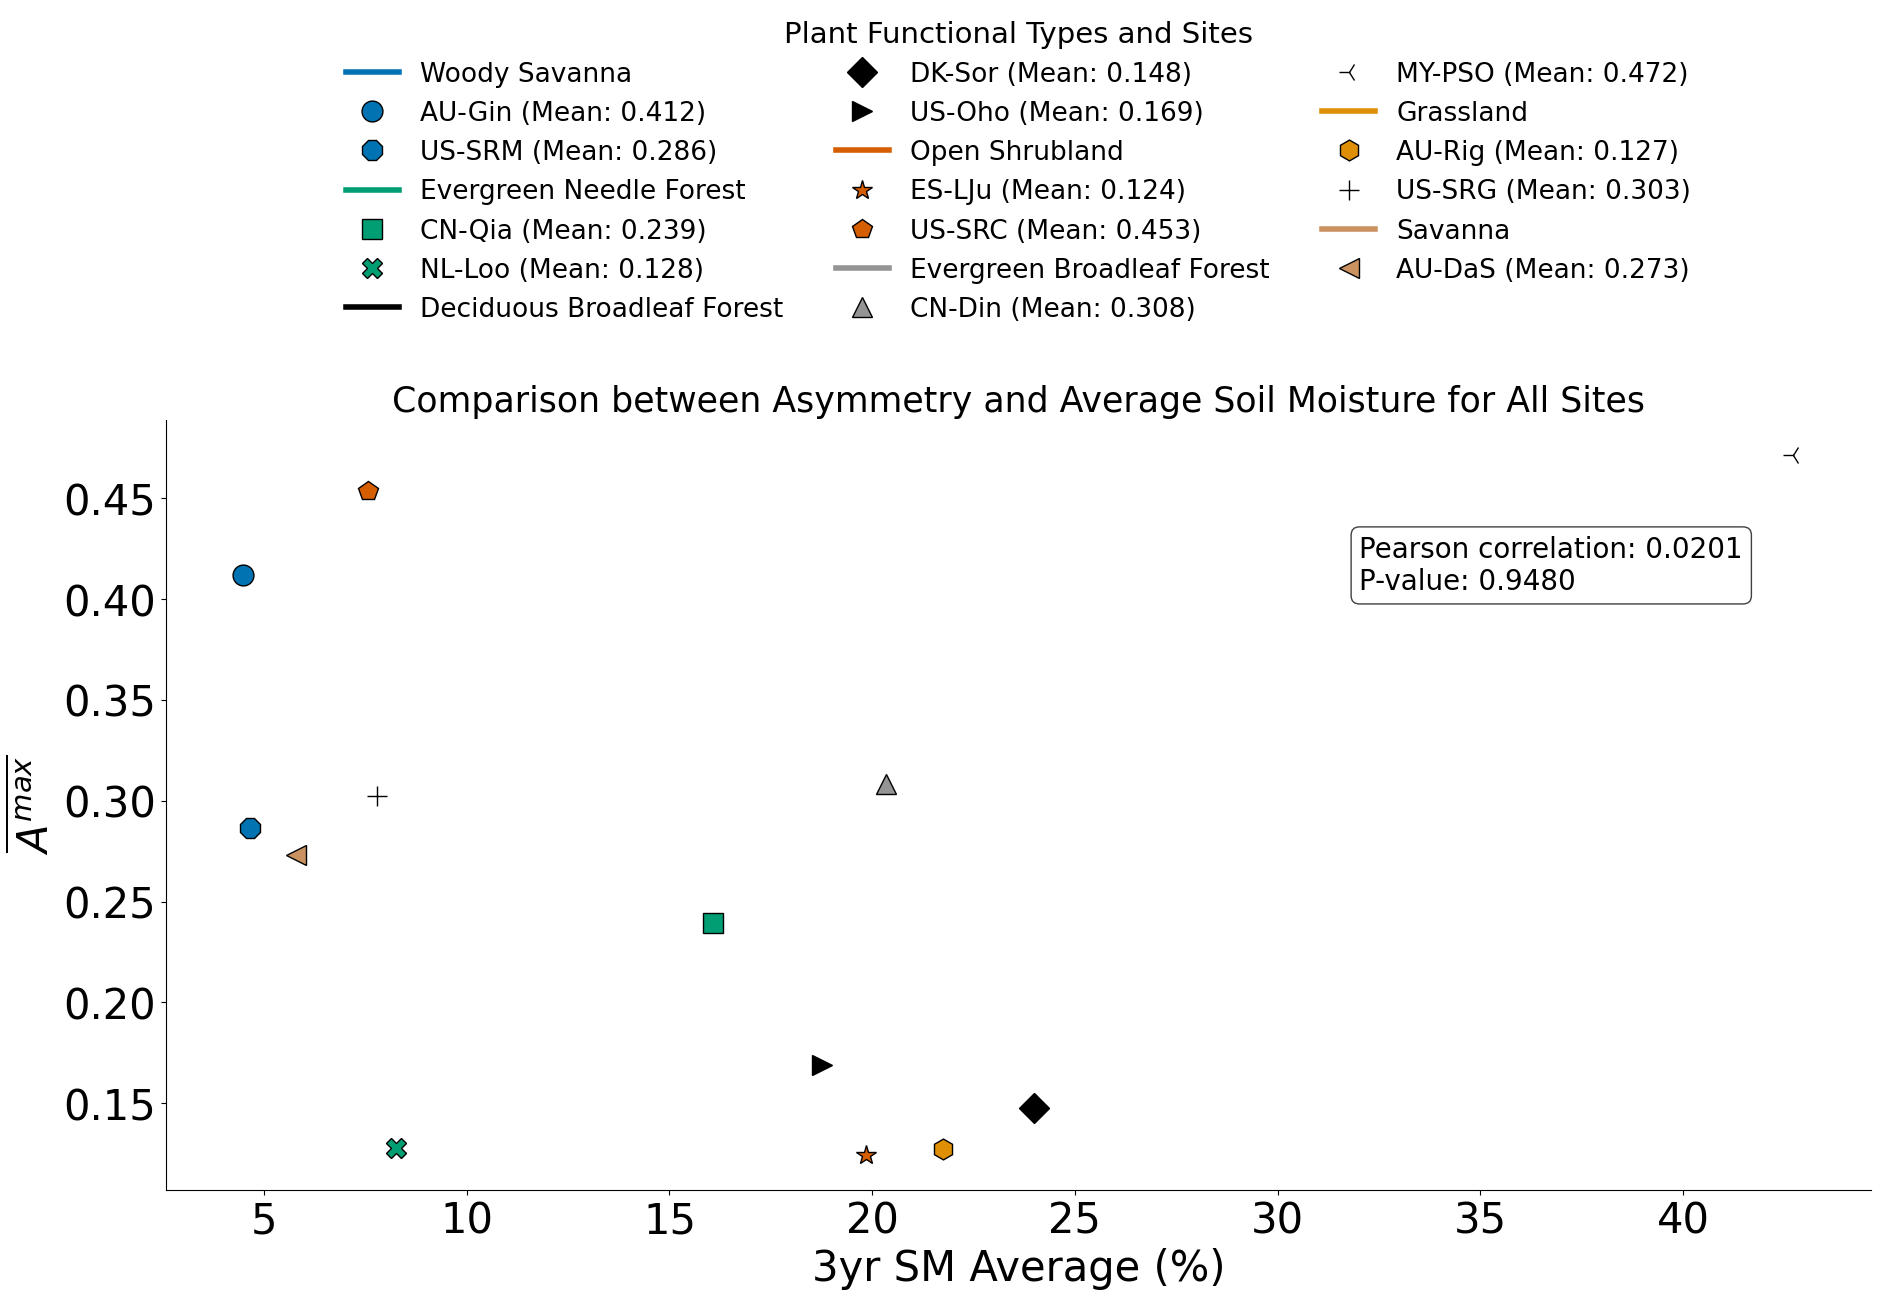

In [14]:
# creating ditionary to store soil moisture data
sm_data = {}

for file, marker in zip(file_names, markers):
    site_val = file[:5]
    
    if site_val in site_labels:
        pft, label = site_labels[site_val]
        color = pft_colors[pft]
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/3YRSM/{file}")
        sm_3yr = df.iloc[0, 1]   
        peakssm = df.iloc[:, 0]
        meanacsm = np.mean(peakssm)
        stdacsm = np.std(peakssm)
        sm_data[label] = {"sm_3yr": sm_3yr, "meanacsm": meanacsm, "stdacsm": stdacsm, "marker": marker, "color": color}

# calculating statistics and getting data
x_data = []
y_data = []
for site, data in sm_data.items():
    x_data.append(data["sm_3yr"])
    y_data.append(data["meanacsm"])

x_data = np.array(x_data)
y_data = np.array(y_data)

corr, p_value = stats.pearsonr(x_data, y_data)

#Plotting
fig, ax_main = plt.subplots(figsize=(22, 10))

# Plot only mean
for site, data in sm_data.items():
    ax_main.plot(data["sm_3yr"], data["meanacsm"],
                 marker=data["marker"], color=data["color"], 
                 markeredgecolor='black', markerfacecolor=data["color"],
                 label=site, markersize=15)

ax_main.set_xlabel('3yr SM Average (%)', fontsize=30)
ax_main.set_ylabel('$\overline{A^{max}}$', fontsize=30)
ax_main.tick_params(axis='both', which='major', labelsize=30)
ax_main.set_title('Comparison between Asymmetry and Average Soil Moisture for All Sites', fontsize=25)
ax_main.spines['right'].set_visible(False)
ax_main.spines['top'].set_visible(False)

textstr = f'Pearson correlation: {corr:.4f}\nP-value: {p_value:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.75)
ax_main.text(0.7, 0.85, textstr, transform=ax_main.transAxes, fontsize=20,
             verticalalignment='top', bbox=props)

# Creating the legend
handles, labels = ax_main.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

pft_groups = {}
for site_val, (pft, site_label) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_label)

legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            data = sm_data[site]
            legend_elements.append(plt.Line2D([0], [0], marker=data['marker'], color='w', 
                                              label=f"{site} (Mean: {data['meanacsm']:.3f})",
                                              markerfacecolor=color, markersize=15, markeredgecolor='black'))

legend = ax_main.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.55), 
                        fontsize=19, title="Plant Functional Types and Sites", ncol=3,frameon=False)

legend.get_title().set_fontsize(21)

plt.show()

Figure S10 in the Supplementary information - Relationship between average NEE asymmetry and daily average soil moisture for top 1% fluctuations for all sites

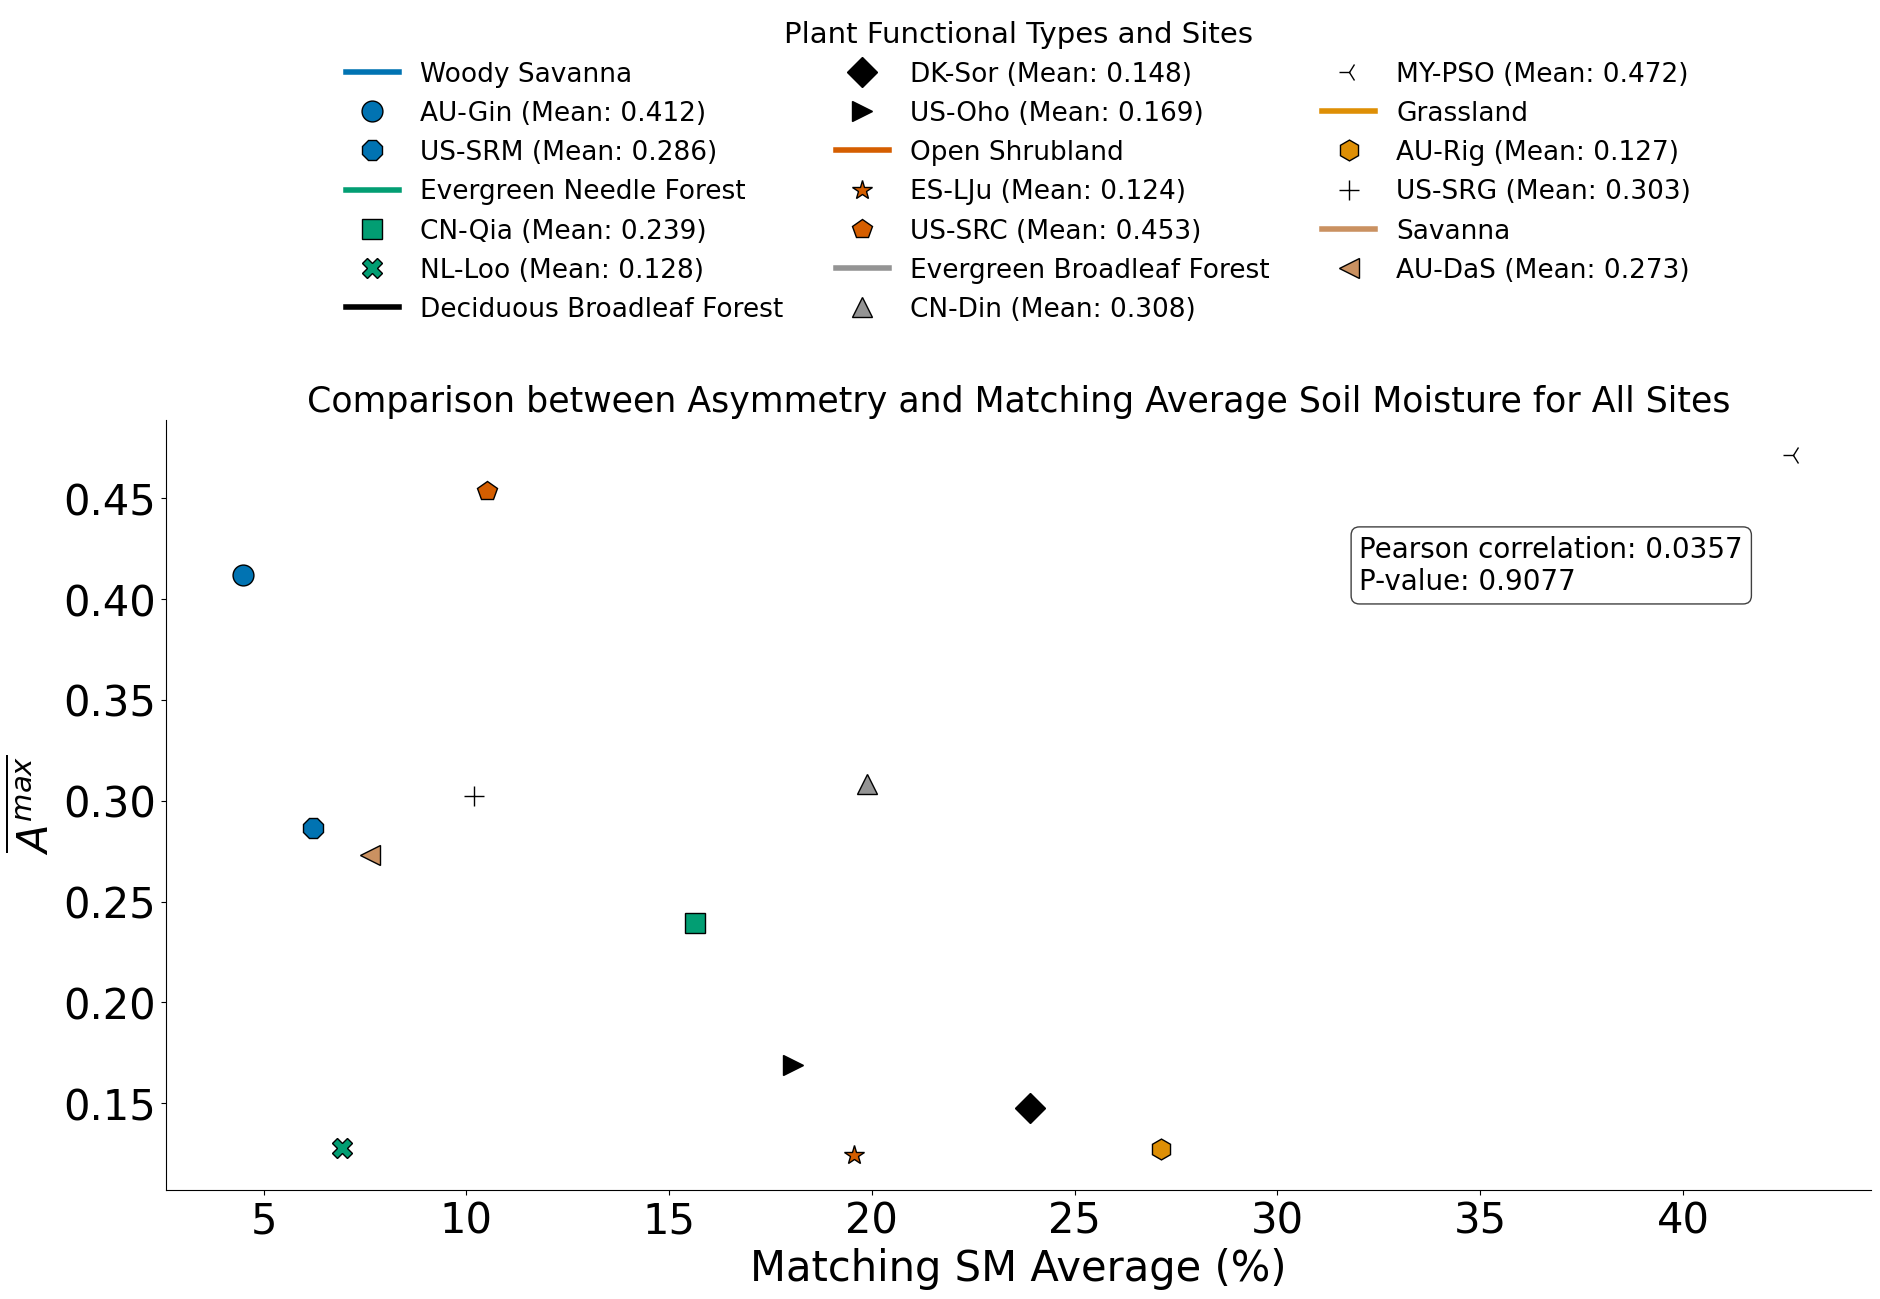

In [15]:
# creating ditionary to store soil moisture data
sm_data = {}

for file, marker in zip(file_names, markers):
    site_val = file[:5]
    
    if site_val in site_labels:
        pft, label = site_labels[site_val]
        color = pft_colors[pft]
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/MATCHINGSM/{file}")
        sm_mtchng = df.iloc[0, 1]   
        peakssm = df.iloc[:, 0]
        meanacsm = np.mean(peakssm)
        stdacsm = np.std(peakssm)
        sm_data[label] = {"sm_mtchng": sm_mtchng, "meanacsm": meanacsm, "stdacsm": stdacsm, "marker": marker, "color": color}

# calculating statistics and getting data
x_data = []
y_data = []
for site, data in sm_data.items():
    x_data.append(data["sm_mtchng"])
    y_data.append(data["meanacsm"])

x_data = np.array(x_data)
y_data = np.array(y_data)

corr, p_value = stats.pearsonr(x_data, y_data)

#Plotting
fig, ax_main = plt.subplots(figsize=(22, 10))

for site, data in sm_data.items():
    ax_main.plot(data["sm_mtchng"], data["meanacsm"],
                 marker=data["marker"], color=data["color"], 
                 markeredgecolor='black', markerfacecolor=data["color"],
                 label=site, markersize=15)

ax_main.set_xlabel('Matching SM Average (%)', fontsize=30)
ax_main.set_ylabel('$\overline{A^{max}}$', fontsize=30)
ax_main.tick_params(axis='both', which='major', labelsize=30)
ax_main.set_title('Comparison between Asymmetry and Matching Average Soil Moisture for All Sites', fontsize=25)
ax_main.spines['right'].set_visible(False)
ax_main.spines['top'].set_visible(False)

textstr = f'Pearson correlation: {corr:.4f}\nP-value: {p_value:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.75)
ax_main.text(0.7, 0.85, textstr, transform=ax_main.transAxes, fontsize=20,
             verticalalignment='top', bbox=props)

# Creating the legend
handles, labels = ax_main.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Group labels by PFT
pft_groups = {}
for site_val, (pft, site_label) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_label)

legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            data = sm_data[site]
            legend_elements.append(plt.Line2D([0], [0], marker=data['marker'], color='w', 
                                              label=f"{site} (Mean: {data['meanacsm']:.3f})",
                                              markerfacecolor=color, markersize=15, markeredgecolor='black'))

legend = ax_main.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.55), 
                        fontsize=19, title="Plant Functional Types and Sites", ncol=3, frameon=False)

legend.get_title().set_fontsize(21)

plt.show()

Figure S11 in the Supplementary information - Relationship between average NEE asymmetry and daily average temperature for top 1% fluctuations for all sites

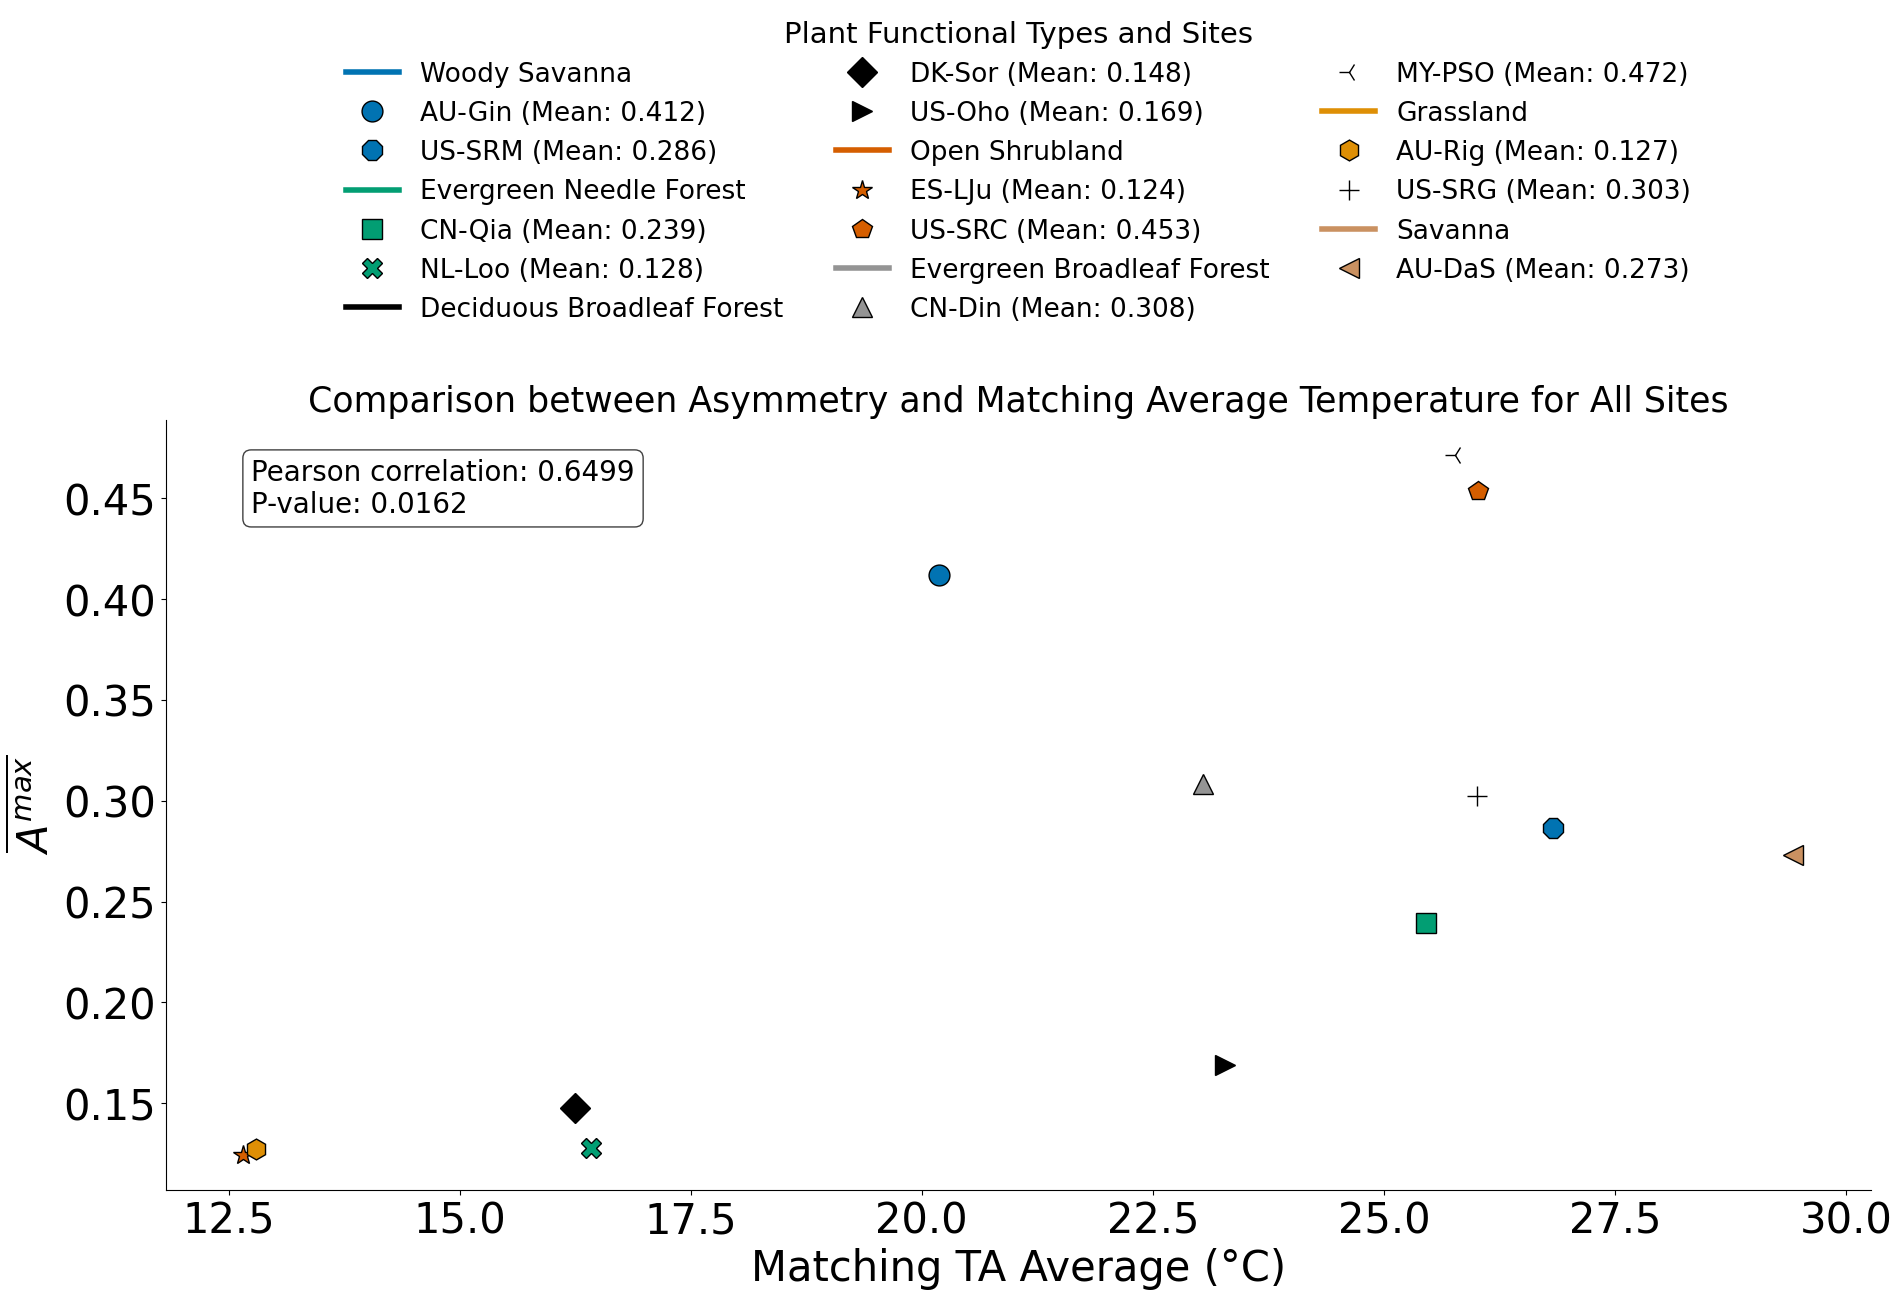

In [16]:
# creating ditionary to store temperature data
ta_data = {}

for file, marker in zip(file_names, markers):
    site_val = file[:5]
    
    if site_val in site_labels:
        pft, label = site_labels[site_val]
        color = pft_colors[pft]
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/MATCHINGTEMP/{file}")
        ta_mtchng = df.iloc[0, 1]   
        peaksta = df.iloc[:, 0]
        meanacta = np.mean(peaksta)
        stdacta = np.std(peaksta)
        ta_data[label] = {"ta_mtchng": ta_mtchng, "meanacta": meanacta, "stdacta": stdacta, "marker": marker, "color": color}

# calculating statistics and getting data
x_data = []
y_data = []
for site, data in ta_data.items():
    x_data.append(data["ta_mtchng"])
    y_data.append(data["meanacta"])

x_data = np.array(x_data)
y_data = np.array(y_data)

corr, p_value = stats.pearsonr(x_data, y_data)

# Plotting
fig, ax_main = plt.subplots(figsize=(22, 10))

for site, data in ta_data.items():
    ax_main.plot(data["ta_mtchng"], data["meanacta"],
                 marker=data["marker"], color=data["color"], 
                 markeredgecolor='black', markerfacecolor=data["color"],
                 label=site, markersize=15)

ax_main.set_xlabel('Matching TA Average (°C)', fontsize=30)
ax_main.set_ylabel('$\overline{A^{max}}$', fontsize=30)
ax_main.tick_params(axis='both', which='major', labelsize=30)
ax_main.set_title('Comparison between Asymmetry and Matching Average Temperature for All Sites', fontsize=25)
ax_main.spines['right'].set_visible(False)
ax_main.spines['top'].set_visible(False)

textstr = f'Pearson correlation: {corr:.4f}\nP-value: {p_value:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.75)
ax_main.text(0.05, 0.95, textstr, transform=ax_main.transAxes, fontsize=20,
             verticalalignment='top', bbox=props)

# Creating the legend
handles, labels = ax_main.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pft_groups = {}
for site_code, (pft, site_label) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_label)

legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            data = ta_data[site]
            legend_elements.append(plt.Line2D([0], [0], marker=data['marker'], color='w', 
                                              label=f"{site} (Mean: {data['meanacta']:.3f})",
                                              markerfacecolor=color, markersize=15, markeredgecolor='black'))

legend = ax_main.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.55), 
                        fontsize=19, title="Plant Functional Types and Sites", ncol=3, frameon=False)

legend.get_title().set_fontsize(21)

plt.show()